# In this notebook I will be performing Sentiment analysis on Twitter data 

## Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Adding Dataset

In [6]:
train_data = pd.read_csv(r"C:\Users\jainr\OneDrive\Desktop\DS projects\twitter sentiment analysis\train.csv")
test_data = pd.read_csv(r"C:\Users\jainr\OneDrive\Desktop\DS projects\twitter sentiment analysis\test.csv")

## Data Exploration

In [7]:
print(train_data.shape)
print(test_data.shape)

(31962, 3)
(17197, 2)


In [8]:
train_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [9]:
test_data.head(10)


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [10]:
train_data.isnull().any()


id       False
label    False
tweet    False
dtype: bool

In [11]:
test_data.isnull().any()


id       False
tweet    False
dtype: bool

In [12]:
# checking for negative comments from the train dataset
train_data[train_data['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [13]:
# checking for positive comments from the test dataset
train_data[train_data['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


## Data Visualization

<AxesSubplot:>

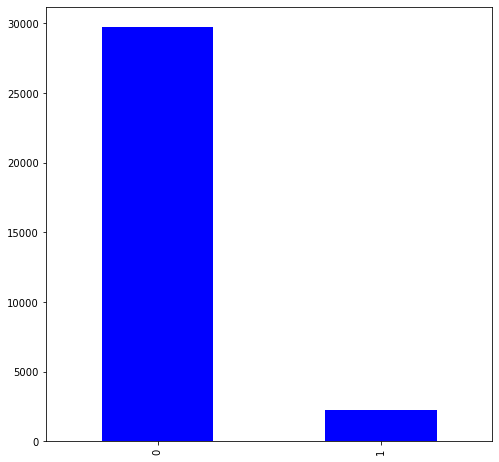

In [14]:
train_data['label'].value_counts().plot.bar(color = 'blue' , figsize=(8,8))

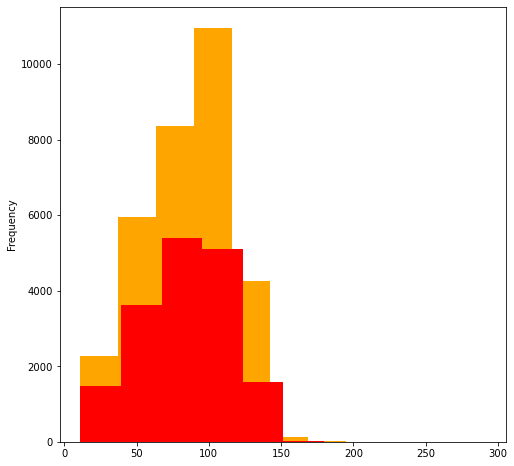

In [15]:
# checking the distribution of tweets in the data 

length_train = train_data['tweet'].str.len().plot.hist(color = 'orange' , figsize = (8,8))
length_test = test_data['tweet'].str.len().plot.hist(color = 'red' , figsize = (8,8))

In [16]:
# add column to represent the length of the tweets 
train_data['length'] = train_data['tweet'].str.len()
test_data['length']  = test_data['tweet'].str.len()

In [17]:
train_data.head()

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [18]:
test_data.head()

,id,tweet,length
0,31963,#studiolife #aislife #requires #passion #dedic...,90
1,31964,@user #white #supremacists want everyone to s...,101
2,31965,safe ways to heal your #acne!! #altwaystohe...,71
3,31966,is the hp and the cursed child book up for res...,142
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",93


In [19]:
train_data.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                 length                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

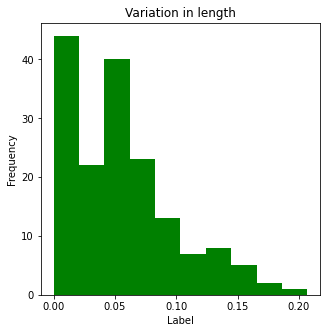

In [20]:
train_data.groupby('length').mean()['label'].plot.hist(color = 'green' , figsize = (5,5))
plt.title('Variation in length')
plt.xlabel('Label')
plt.show()

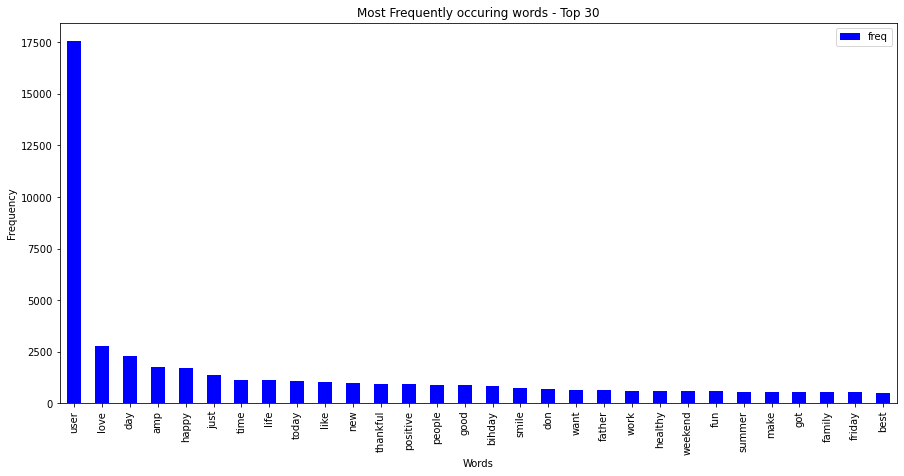

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_data.tweet)

sum_words = words.sum(axis = 0)

words_freq = [(word, sum_words[0,i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15,7), color= "blue")
plt.title("Most Frequently occuring words - Top 30")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [23]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [27]:
from wordcloud import WordCloud

WordCloud = WordCloud(background_color = 'black', width = 1000, height= 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(WordCloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize= 25)


ValueError: Only supported for TrueType fonts

In [28]:
# collecting the hashtags
import regex as re 

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [29]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train_data['tweet'][train_data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train_data['tweet'][train_data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

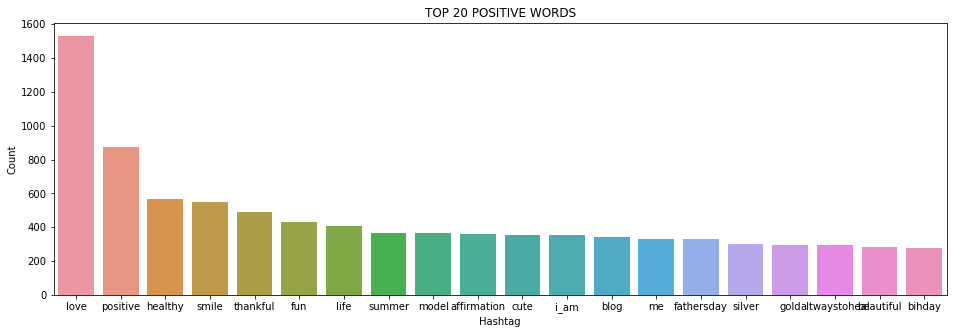

In [30]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("TOP 20 POSITIVE WORDS")
plt.show()


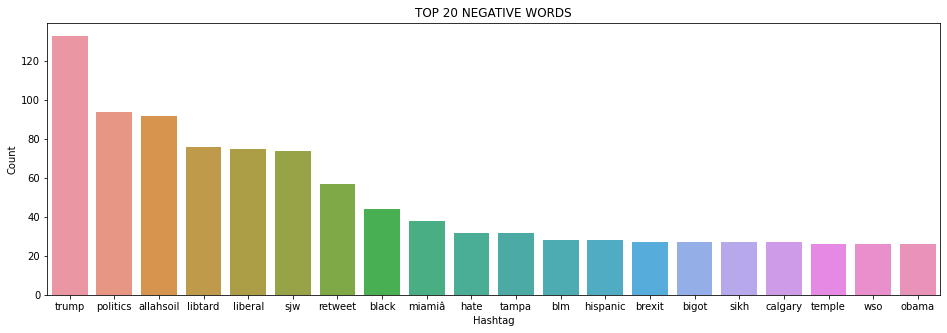

In [31]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("TOP 20 NEGATIVE WORDS")
plt.show()

In [32]:
# tokenizing the words present in the training set
tokenized_tweet = train_data['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train_data['tweet']), epochs=20)

(6109477, 8411580)

In [33]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6641886234283447),
 ('#prosecco', 0.6287930607795715),
 ('#wanderlust', 0.6125945448875427),
 ('coaching', 0.6044615507125854),
 ('sister!!', 0.5918837785720825),
 ('fluffy', 0.5900291800498962),
 ('willow', 0.5867475271224976),
 ('podium', 0.5864992737770081),
 ("saturday's", 0.5846751928329468),
 ('shopping!', 0.5821298956871033)]

In [34]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7146190404891968),
 ('level.', 0.6984267830848694),
 ('ways.', 0.6973731517791748),
 ('law.', 0.6957812905311584),
 ('#merica', 0.6862381100654602),
 ('targeted', 0.6860473155975342),
 ('aol', 0.6851398944854736),
 ('ownership', 0.682929277420044),
 ('tolerance', 0.680669903755188),
 ('behavior.', 0.6801535487174988)]

In [35]:
model_w2v.wv.most_similar(positive = "apple")

[('mytraining', 0.7003649473190308),
 ('"mytraining"', 0.6981585025787354),
 ('training"', 0.6784074902534485),
 ('app,', 0.6202307939529419),
 ('"my', 0.5922210216522217),
 ('app', 0.590274453163147),
 ('bees', 0.5847281813621521),
 ('heroku', 0.5637685060501099),
 ('humans.', 0.561028778553009),
 ('ta', 0.5606730580329895)]

In [36]:
model_w2v.wv.most_similar(negative = "apple")

[('#instalike', 0.042469680309295654),
 ('#sunshine', 0.040723759680986404),
 ('#lucky', 0.021720536053180695),
 ('#thursday', 0.016488617286086082),
 ('#kitty', 0.012798608280718327),
 ('#candles', 0.012686030939221382),
 ('united', 0.009245511144399643),
 ('under', 0.0040033115074038506),
 ('#black', 0.0033070554491132498),
 ('#style', 0.0028549209237098694)]

In [37]:
model_w2v.wv.most_similar(negative= "hate")

[('#staup', 0.004293693229556084),
 ('#css', 0.002880991203710437),
 ('#tgif', 0.0026420466601848602),
 ('ð\x9f\x8d»', 0.002227417891845107),
 ('#bus', 0.001749643124639988),
 ('â\x9c\x88ï¸\x8f', 0.0011487490264698863),
 ('#community', -0.00020760581537615508),
 ('yay!', -0.0005217552534304559),
 ('ð\x9f\x8e\x93', -0.0020568021573126316),
 ('lion', -0.003312782384455204)]

In [38]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jainr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [39]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train_data['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [40]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test_data['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [41]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train_data.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [49]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


## Standardization

In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

## Model Training
## RandonForestClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9521962207483419
F1 score : 0.6172344689378757
[[7301  131]
 [ 251  308]]


## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

C:\Users\jainr\newww\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


## Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.932048554623952
f1 score : 0.5339055793991417
[[7137  295]
 [ 248  311]]


- By - Ritvik Jain
- Stevens Institute of Technology 